In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("twitter sendiment analysis.csv",encoding="cp1252",names=["target","id","date","flag","user","text"])
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.shape

(1600000, 6)

In [4]:
df=df.drop(["id","date","flag"], axis = 1)
df.head()

,target,user,text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   user    1600000 non-null  object
 2   text    1600000 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


In [6]:
df = df[["user","text","target"]]
df.head()

,user,text,target
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,scotthamilton,is upset that he can't update his Facebook by ...,0
2,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,ElleCTF,my whole body feels itchy and like its on fire,0
4,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [7]:
df["target"].unique()

array([0, 4], dtype=int64)

In [8]:
df["target"] = df["target"].replace(4,1)
df.head()

,user,text,target
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,scotthamilton,is upset that he can't update his Facebook by ...,0
2,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,ElleCTF,my whole body feels itchy and like its on fire,0
4,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [9]:
df["target"].unique()

array([0, 1], dtype=int64)

In [10]:
df["target"].value_counts()

1    800000
0    800000
Name: target, dtype: int64

In [11]:
df["target"].value_counts(normalize=True) * 100

1    50.0
0    50.0
Name: target, dtype: float64

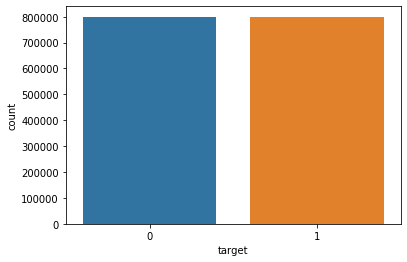

In [12]:
sns.countplot(x = df["target"])

In [13]:
df.isnull().sum()

user      0
text      0
target    0
dtype: int64

In [14]:
df_pos = df[df["target"] == 1]
df_neg = df[df["target"] == 0]

In [15]:
df_pos.shape

(800000, 3)

In [16]:
df_neg.shape

(800000, 3)

In [17]:
df_pos = df_pos.iloc[:int(50000)]
df_neg = df_neg.iloc[:int(50000)]

In [18]:
df_pos.shape

(50000, 3)

In [19]:
df_neg.shape

(50000, 3)

In [20]:
df = pd.concat([df_pos,df_neg])
df.head()

,user,text,target
800000,ersle,I LOVE @Health4UandPets u guys r the best!!,1
800001,becca210,im meeting up with one of my besties tonight! ...,1
800002,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,katarinka,Being sick can be really cheap when it hurts t...,1
800004,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,1


In [21]:
df.shape

(100000, 3)

In [22]:
df["target"].value_counts()

1    50000
0    50000
Name: target, dtype: int64

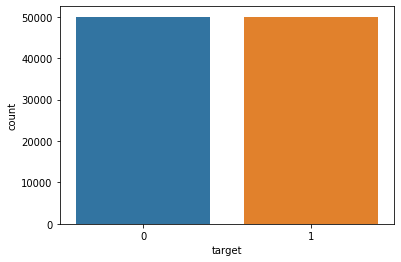

In [23]:
sns.countplot(x=df["target"])

In [24]:
df.isnull().sum()

user      0
text      0
target    0
dtype: int64

In [25]:
df["text"]

800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
800003    Being sick can be really cheap when it hurts t...
800004      @LovesBrooklyn2 he has that effect on everyone 
                                ...                        
49995     @mileycyrus so i have the same insomnia prob a...
49996     20 mintues late for my meeting starting @ 8  h...
49997     @kentucky_derby super excited! Are you tweetin...
49998     I WANT ANOTHER DAY OFF!!!!  To much Sh#t to do...
49999                  i just jacked up this umbrella cake 
Name: text, Length: 100000, dtype: object

In [26]:
df["text"] = df["text"].str.lower()
df["text"]

800000         i love @health4uandpets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @darealsunisakim thanks for the twitter add, s...
800003    being sick can be really cheap when it hurts t...
800004      @lovesbrooklyn2 he has that effect on everyone 
                                ...                        
49995     @mileycyrus so i have the same insomnia prob a...
49996     20 mintues late for my meeting starting @ 8  h...
49997     @kentucky_derby super excited! are you tweetin...
49998     i want another day off!!!!  to much sh#t to do...
49999                  i just jacked up this umbrella cake 
Name: text, Length: 100000, dtype: object

In [27]:
import string
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def remove_punc(x):
    translator = str.maketrans(" "," ",punc)
    return x.translate(translator)

In [29]:
df["text"] = df["text"].apply(lambda x:remove_punc(x))
df["text"]

800000            i love health4uandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004       lovesbrooklyn2 he has that effect on everyone 
                                ...                        
49995     mileycyrus so i have the same insomnia prob as...
49996     20 mintues late for my meeting starting  8  ho...
49997     kentuckyderby super excited are you tweeting t...
49998     i want another day off  to much sht to do toda...
49999                  i just jacked up this umbrella cake 
Name: text, Length: 100000, dtype: object

In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

df["text"] = df["text"].apply(remove_stopwords)
df["text"].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait girl ...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [32]:
df.head()

,user,text,target
800000,ersle,love health4uandpets u guys r best,1
800001,becca210,im meeting one besties tonight cant wait girl ...,1
800002,Wingman29,darealsunisakim thanks twitter add sunisa got ...,1
800003,katarinka,sick really cheap hurts much eat real food plu...,1
800004,_EmilyYoung,lovesbrooklyn2 effect everyone,1


In [33]:
df.tail()

,user,text,target
49995,Jessica_567,mileycyrus insomnia prob slept 3 hrs woke 5am ...,0
49996,whouwit077,20 mintues late meeting starting 8 howd know g...,0
49997,AmyPR,kentuckyderby super excited tweeting event hap...,0
49998,cynthia_sue03,want another day much sht today got quotnewuse...,0
49999,msceo8,jacked umbrella cake,0


In [34]:
import re

def remove_digits(text):
    return re.sub("[0-9]+"," ",text)

df["text"] = df["text"].apply(remove_digits)
df["text"]

800000                   love health uandpets u guys r best
800001    im meeting one besties tonight cant wait girl ...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn  effect everyone
                                ...                        
49995     mileycyrus insomnia prob slept   hrs woke  am ...
49996       mintues late meeting starting   howd know go...
49997     kentuckyderby super excited tweeting event hap...
49998     want another day much sht today got quotnewuse...
49999                                  jacked umbrella cake
Name: text, Length: 100000, dtype: object

In [35]:
def remove_url(text):
    return re.sub("((www.[^s]+) | (https?://[^s]+))"," ",text)

df["text"] = df["text"].apply(remove_url)
df["text"]

800000                   love health uandpets u guys r best
800001    im meeting one besties tonight cant wait girl ...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn  effect everyone
                                ...                        
49995     mileycyrus insomnia prob slept   hrs woke  am ...
49996       mintues late meeting starting   howd know go...
49997     kentuckyderby super excited tweeting event hap...
49998     want another day much sht today got quotnewuse...
49999                                  jacked umbrella cake
Name: text, Length: 100000, dtype: object

In [36]:
df.tail(10)

,user,text,target
49990,Hersheys07,says goodness sorry n tlga tears blush unsure ...,0
49991,Pandora_dsi,another diminishing supply mornings totally wa...,0
49992,henleyt1,happy came work hours early,0
49993,j_navarra,mmmmmmmmmhangover slept training ride,0
49994,henleyt1,thisismyiq early,0
49995,Jessica_567,mileycyrus insomnia prob slept hrs woke am ...,0
49996,whouwit077,mintues late meeting starting howd know go...,0
49997,AmyPR,kentuckyderby super excited tweeting event hap...,0
49998,cynthia_sue03,want another day much sht today got quotnewuse...,0
49999,msceo8,jacked umbrella cake,0


In [37]:
regex = r'\b(\w+)(?:\W+\1\b)+'

def clean_repeat_words(text):
    return re.sub(regex," ",text)

df["text"] = df["text"].apply(clean_repeat_words)
df["text"]

800000                   love health uandpets u guys r best
800001    im meeting one besties tonight cant wait girl ...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn  effect everyone
                                ...                        
49995     mileycyrus insomnia prob slept   hrs woke  am ...
49996       mintues late meeting starting   howd know go...
49997     kentuckyderby super excited tweeting event hap...
49998     want another day much sht today got quotnewuse...
49999                                  jacked umbrella cake
Name: text, Length: 100000, dtype: object

In [38]:
df.head(25)

,user,text,target
800000,ersle,love health uandpets u guys r best,1
800001,becca210,im meeting one besties tonight cant wait girl ...,1
800002,Wingman29,darealsunisakim thanks twitter add sunisa got ...,1
800003,katarinka,sick really cheap hurts much eat real food plu...,1
800004,_EmilyYoung,lovesbrooklyn effect everyone,1
800005,ajarofalmonds,productoffear tell burst laughing really loud ...,1
800006,vmdavinci,rkeithhill thans response ihad already find an...,1
800007,jessicavaliyi,keepinupwkris jealous hope great time vegas li...,1
800008,emmasaur28,tommcfly ah congrats mr fletcher finally joini...,1
800009,SherylBreuker,e voip responded stupid cat helping type forgi...,1


In [39]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps

<PorterStemmer>

In [40]:
def stemming_data(data):
  text = [ps.stem(data) for word in data]
  return data

df["text"] = df["text"].apply(lambda x: stemming_data(x))
df.tail()

,user,text,target
49995,Jessica_567,mileycyrus insomnia prob slept hrs woke am ...,0
49996,whouwit077,mintues late meeting starting howd know go...,0
49997,AmyPR,kentuckyderby super excited tweeting event hap...,0
49998,cynthia_sue03,want another day much sht today got quotnewuse...,0
49999,msceo8,jacked umbrella cake,0


In [41]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [wnl.lemmatize(word) for word in data]
    return data

df['text'] = df['text'].apply(lambda x : lemmatizer_on_text(x))
df.tail()

,user,text,target
49995,Jessica_567,mileycyrus insomnia prob slept hrs woke am ...,0
49996,whouwit077,mintues late meeting starting howd know go...,0
49997,AmyPR,kentuckyderby super excited tweeting event hap...,0
49998,cynthia_sue03,want another day much sht today got quotnewuse...,0
49999,msceo8,jacked umbrella cake,0


In [42]:
X = df.drop('target', axis = 1)
y = df['target']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
X_train = X_train.drop('user', axis = 1)
X_train

,text
842865,ceo switching tweetdeck using twhirl
41446,omg am hot damn blistering summer makes sad
16374,twitter followers
29106,cant excited missing everyone
813404,nileylovestory yea true bigger person amp let ...
...,...
821243,got wee caramel sundae mcdsthese r yummy cheer...
845891,lgladdy thank kind words well keep updated mp ...
842613,going pick swayswaybaby time spidey action gym...
843567,mileycyrus tell perezhilton truth chickedy


In [45]:
X_test = X_test.drop('user', axis = 1)
X_test

,text
803582,mileycyrus friends hour get line gma today say...
10498,zoo hopefully going tonight though
3227,justagirl thats great license wish youd got r...
821333,sun friend makes feel almost normal yay
803885,yes manechyou stink fishget
...,...
36308,nite everyone tai wouldnt say bye msn cries g...
848870,obamas policy called fascist economic socialis...
834940,metsgal normal hehe
821964,kimboleigh lmfao get make yaself


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [47]:
cv.fit(X_train['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [48]:
X_train = cv.transform(X_train['text'])
X_test = cv.transform(X_test['text'])

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7569

In [53]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [54]:
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [55]:
y_pred_bnb = bnb.predict(X_test)
y_pred_bnb

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bnb)

0.7510666666666667